In [20]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

image = cv.imread('images/lena.jpg')

#### 1. Dilasi (SED) berbentuk cross 3 x 3 tanpa menggunakan library morphology dari openCV

In [21]:
# function for read image
def read_img(image):
  image_src = cv.imread(image, 0)
  return image_src

# function for convert binary
def convert_binary(image_src, thresh_val):
  color_1 = 255
  color_2 = 0
  initial_conv = np.where((image_src <= thresh_val), image_src, color_1)
  final_conv = np.where((initial_conv > thresh_val), initial_conv, color_2)
  return final_conv

def binarize_img(image_file, thresh_val=127):
  image_src = read_img(image_file)
  image_b = convert_binary(image_src, thresh_val)
  return image_b


In [22]:
# Function for dilation
def dilation(image_file, dilation_level=3, with_plot=False):
    # setting the dilation_level
    dilation_level = 3 if dilation_level < 3 else dilation_level

    # obtain the kernel by the shape of (dilation_level, dilation_level)
    structuring_kernel = np.full(shape=(dilation_level, dilation_level), fill_value=255)
    image_src = binarize_img(image_file=image_file)

    orig_shape = image_src.shape
    pad_width = dilation_level - 2

    # pad the image with pad_width
    image_pad = np.pad(array=image_src, pad_width=pad_width, mode='constant')
    pimg_shape = image_pad.shape
    h_reduce, w_reduce = (pimg_shape[0] - orig_shape[0]), (pimg_shape[1] - orig_shape[1])

    # obtain the submatrices according to the size of the kernel
    flat_submatrices = np.array([
        image_pad[i:(i + dilation_level), j:(j + dilation_level)]
        for i in range(pimg_shape[0] - h_reduce) for j in range(pimg_shape[1] - w_reduce)
    ])

    # replace the values either 255 or 0 by dilation condition
    image_dilate = np.array([255 if (i == structuring_kernel).any() else 0 for i in flat_submatrices])
    # obtain new matrix whose shape is equal to the original image size
    image_dilate = image_dilate.reshape(orig_shape)

    # plotting
    if with_plot:
        cmap_val = 'gray'
        fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 20))

        ax1.axis("off")
        ax1.title.set_text('Original')

        ax2.axis("off")
        ax2.title.set_text("Dilated - {}".format(dilation_level))

        ax1.imshow(image_src, cmap=cmap_val)
        ax2.imshow(image_dilate, cmap=cmap_val)
        plt.show()
        return True
    return image_dilate

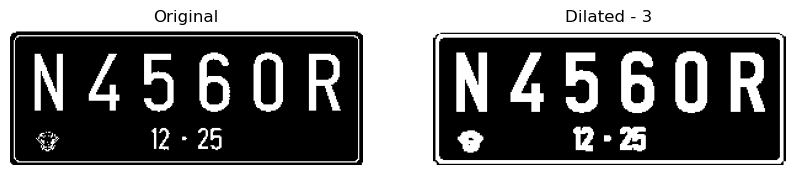

In [23]:
image_dilation = dilation('images/plat_nomer.jpg', dilation_level=3, with_plot=True)

#### 2. Dilasi (SED) berbentuk cross 3 x 3 menggunakan library morphology dari openCV

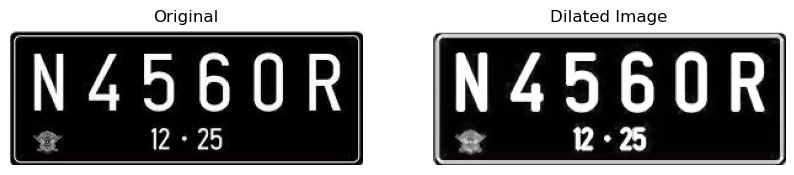

In [24]:
image = cv.imread('images/plat_nomer.jpg')

# define kernel
kernel3 = np.array([[0, 1, 0],
                    [1, 1, 1],
                    [0, 1, 0]], dtype=np.uint8)
#dilation process
image_dilated = cv.dilate(image, kernel3, iterations=1)

# PLOTTING
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 20))
ax1.axis("off")
ax1.title.set_text('Original')

ax2.axis("off")
ax2.title.set_text("Dilated Image")

ax1.imshow(image)
ax2.imshow(image_dilated)
plt.show()

#### 3. Erosi (SE) berbentuk square 5 x 5 tanpa library morphology dari openCV

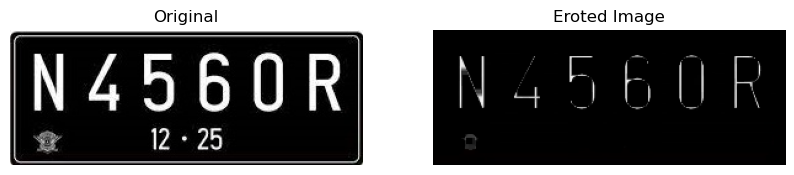

In [25]:
image = cv.imread('images/plat_nomer.jpg')

# Split the image into color channels
b, g, r = cv.split(image)

# Define the 5x5 square-shaped structuring element
structuring_element = np.array([
[1, 1, 1, 1, 1],
[1, 1, 1, 1, 1],
[1, 1, 1, 1, 1],
[1, 1, 1, 1, 1],
[1, 1, 1, 1, 1]
], dtype=np.uint8)

# Initialize the resulting eroded color channels
eroded_b = np.zeros_like(b, dtype=np.uint8)
eroded_g = np.zeros_like(g, dtype=np.uint8)
eroded_r = np.zeros_like(r, dtype=np.uint8)

# Get the height and width of the image
height, width = image.shape[:2]

# Define the structuring element's radius
radius = structuring_element.shape[0] // 2

# Iterate through each pixel in the image
for i in range(radius, height - radius):
    for j in range(radius, width - radius):
        # Extract the region of interest (ROI) in each color channel
        roi_b = b[i - radius : i + radius + 1, j - radius : j + radius + 1]
        roi_g = g[i - radius : i + radius + 1, j - radius : j + radius + 1]
        roi_r = r[i - radius : i + radius + 1, j - radius : j + radius + 1]

        # Perform erosion by element-wise minimum operation
        eroded_b[i, j] = np.min(roi_b)
        eroded_g[i, j] = np.min(roi_g)
        eroded_r[i, j] = np.min(roi_r)

# Merge the eroded color channels back into a colored image
eroded_image = cv.merge((eroded_b, eroded_g, eroded_r))

# PLOTTING
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 20))
ax1.axis("off")
ax1.title.set_text('Original')

ax2.axis("off")
ax2.title.set_text("Eroted Image")

ax1.imshow(image)
ax2.imshow(eroded_image)
plt.show()

#### 4. Erosi (SE) berbentuk square 5 x 5 menggunakan library morphology dari openCV

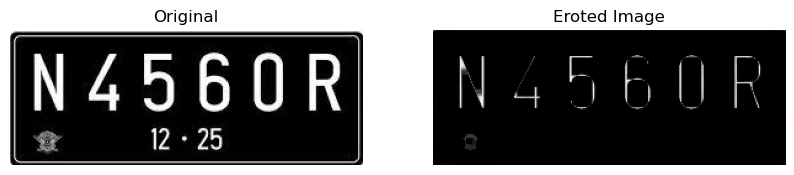

In [26]:
# Taking a matrix of size 5 as the kernel
kernel = np.ones((5, 5), np.uint8)

# eroting image
img_erosion = cv.erode(image, kernel, iterations=1)

# PLOTTING
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 20))
ax1.axis("off")
ax1.title.set_text('Original')

ax2.axis("off")
ax2.title.set_text("Eroted Image")

ax1.imshow(image)
ax2.imshow(img_erosion)
plt.show()

#### 5. Opening Operation (SE) berbentuk square 3 x 3 tanpa library morphology dari openCV

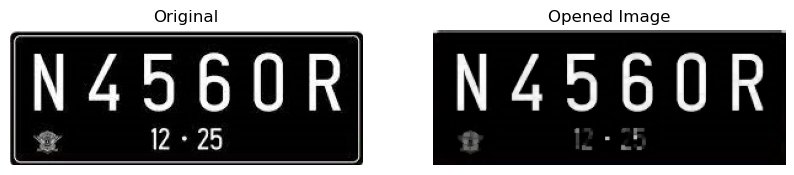

In [27]:
# Split the image into color channels
b, g, r = cv.split(image)

# Define a 3x3 square-shaped structuring element
structuring_element = np.ones((3, 3), dtype=np.uint8)

# Perform erosion manually for each color channel
def custom_erosion(input_image, kernel):
    output_image = np.zeros_like(input_image)
    padded_image = cv.copyMakeBorder(input_image, 1, 1, 1, 1, cv.BORDER_CONSTANT, value=0)
    for i in range(1, input_image.shape[0] + 1):
        for j in range(1, input_image.shape[1] + 1):
            roi = padded_image[i - 1:i + 2, j - 1:j + 2]
            min_val = np.min(roi)
            output_image[i - 1, j - 1] = min_val
    return output_image

# Perform dilation manually for each color channel
def custom_dilation(input_image, kernel):
    output_image = np.zeros_like(input_image)
    padded_image = cv.copyMakeBorder(input_image, 1, 1, 1, 1, cv.BORDER_CONSTANT, value=0)
    for i in range(1, input_image.shape[0] + 1):
        for j in range(1, input_image.shape[1] + 1):
            roi = padded_image[i - 1:i + 2, j - 1:j + 2]
            max_val = np.max(roi)
            output_image[i - 1, j - 1] = max_val
    return output_image

# Perform opening (erosion followed by dilation) for each color channel
eroded_b = custom_erosion(b, structuring_element)
eroded_g = custom_erosion(g, structuring_element)
eroded_r = custom_erosion(r, structuring_element)

opened_b = custom_dilation(eroded_b, structuring_element)
opened_g = custom_dilation(eroded_g, structuring_element)
opened_r = custom_dilation(eroded_r, structuring_element)

# Merge the color channels back into a colored image
opened_image = cv.merge((opened_b, opened_g, opened_r))

# PLOTTING
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 20))
ax1.axis("off")
ax1.title.set_text('Original')

ax2.axis("off")
ax2.title.set_text("Opened Image")

ax1.imshow(image)
ax2.imshow(opened_image)
plt.show()

#### 6. Opening Operation (SE) berbentuk square 3 x 3 menggunakan library morphology dari openCV

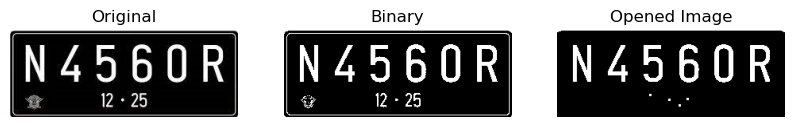

In [28]:
image = cv.imread('images/plat_nomer.jpg')
image_binary = binarize_img('images/plat_nomer.jpg')
image_binary = cv.cvtColor(image_binary, cv.COLOR_GRAY2BGR)

# Define a 3x3 square-shaped structuring element
structuring_element = np.ones((3, 3), dtype=np.uint8)

# Perform the opening operation using morphologyEx
opened_image = cv.morphologyEx(image_binary, cv.MORPH_OPEN, structuring_element)


# PLOTTING
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(10, 20))
ax1.axis("off")
ax1.title.set_text('Original')

ax2.axis("off")
ax2.title.set_text("Binary")

ax3.axis("off")
ax3.title.set_text("Opened Image")

ax1.imshow(image)
ax2.imshow(image_binary)
ax3.imshow(opened_image)
plt.show()

#### 7. Operasi Dilasi dengan Structuring Element berbentuk Cross 3 x 3 dan 5 x 5,

##### With Structuring Element 3 x 3

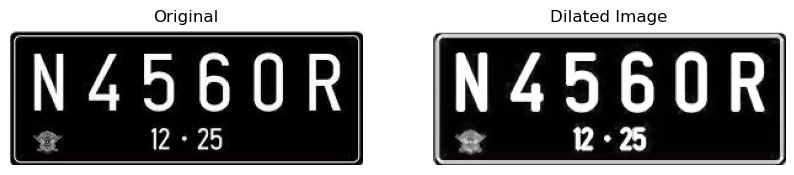

In [29]:
image = cv.imread('images/plat_nomer.jpg')

se_3x3 = np.array([
    [0,1,0],
    [1,1,1],
    [0,1,0]
], dtype=np.uint8)

dilated_image_3 = cv.dilate(image, se_3x3)

# PLOTTING
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 20))
ax1.axis("off")
ax1.title.set_text('Original')

ax2.axis("off")
ax2.title.set_text("Dilated Image")

ax1.imshow(image)
ax2.imshow(dilated_image_3)
plt.show()

##### With Structuring Element 5 x 5

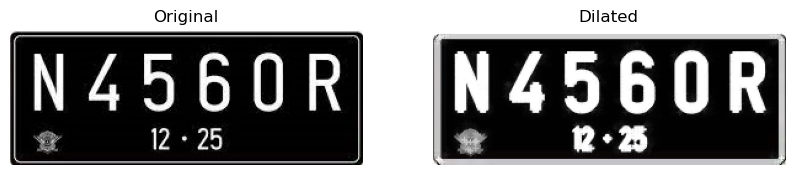

In [30]:
se_5x5 = np.array([
    [0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0],
    [1, 1, 1, 1, 1],
    [0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0]
], dtype=np.uint8)

dilated_image_5 = cv.dilate(image, se_5x5)

# PLOTTING
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 20))
ax1.axis("off")
ax1.title.set_text('Original')

ax2.axis("off")
ax2.title.set_text("Dilated")

ax1.imshow(image)
ax2.imshow(dilated_image_5)
plt.show()

#### 8. Operasi Erosi dengan Structuring Element berbentuk rectangle 3 x 5 dan 5 x 7,

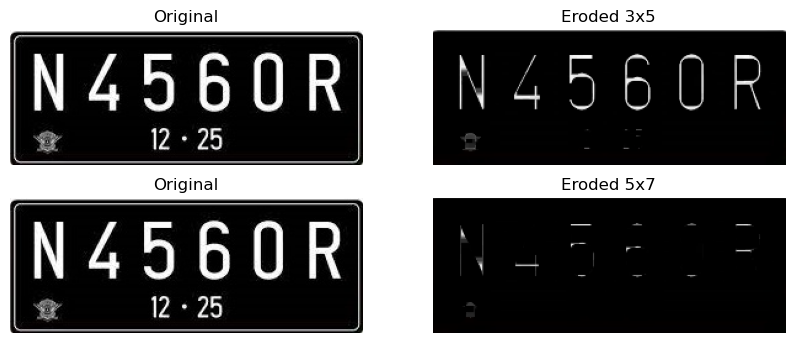

In [31]:
image = cv.imread('images/plat_nomer.jpg')

se_3x5 = np.ones((3,5), dtype=np.uint8)
se_5x7 = np.ones((5,7), dtype=np.uint8)

eroded_image_35 = cv.erode(image, se_3x5, iterations=1)
eroded_image_57 = cv.erode(image, se_5x7, iterations=1)

# PLOTTING
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 4))

# Show the original image in the first subplot
axes[0, 0].axis("off")
axes[0, 0].set_title('Original')
axes[0, 0].imshow(image)

# Show the eroded image in the second subplot
axes[0, 1].axis("off")
axes[0, 1].set_title('Eroded 3x5')
axes[0, 1].imshow(eroded_image_35)

# Show the original image in the first subplot
axes[1, 0].axis("off")
axes[1, 0].set_title('Original')
axes[1, 0].imshow(image)

# Show the eroded image in the second subplot
axes[1, 1].axis("off")
axes[1, 1].set_title('Eroded 5x7')
axes[1, 1].imshow(eroded_image_57)

plt.show()

#### 9.  Implementasi Operasi Erosi dengan Structuring Element berbentuk Line Vertikal 3 dan 5

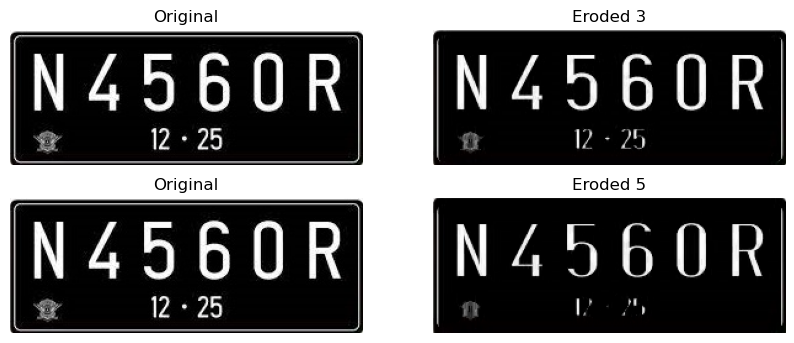

In [32]:
image = cv.imread('images/plat_nomer.jpg')

# Define Structuring Elements (SE)
se_3x3 = np.array([[1],
                   [1],
                   [1]], dtype=np.uint8)

se_5x5 = np.array([[1],
                   [1],
                   [1],
                   [1],
                   [1]], dtype=np.uint8)

# Perform Erosion using cv2.erode
eroded_image_3x3 = cv.erode(image, se_3x3, iterations=1)
eroded_image_5x5 = cv.erode(image, se_5x5,  iterations=1)

# PLOTTING
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 4))

# Show the original image in the first subplot
axes[0, 0].axis("off")
axes[0, 0].set_title('Original')
axes[0, 0].imshow(image)

# Show the eroded image in the second subplot
axes[0, 1].axis("off")
axes[0, 1].set_title('Eroded 3')
axes[0, 1].imshow(eroded_image_3x3)

# Show the original image in the first subplot
axes[1, 0].axis("off")
axes[1, 0].set_title('Original')
axes[1, 0].imshow(image)

# Show the eroded image in the second subplot
axes[1, 1].axis("off")
axes[1, 1].set_title('Eroded 5')
axes[1, 1].imshow(eroded_image_5x5)

plt.show()

#### 10.  Implementasi White Hat Transform

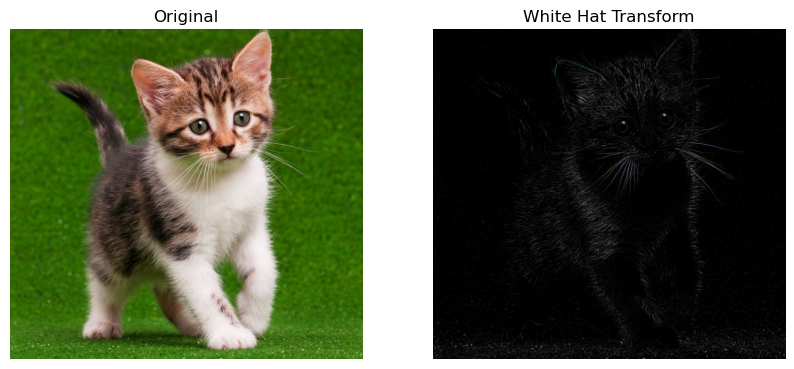

In [33]:
# Read the image in grayscale
image = cv.imread('images/kitten01.jpg')
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Define a kernel (structuring element) - this can be adjusted based on your requirements
kernel = np.ones((5, 5), np.uint8)

# Perform the white hat transform
white_hat = cv.morphologyEx(image, cv.MORPH_TOPHAT, kernel)

# PLOTTING
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 20))
ax1.axis("off")
ax1.title.set_text('Original')

ax2.axis("off")
ax2.title.set_text("White Hat Transform")

ax1.imshow(image)
ax2.imshow(white_hat)
plt.show()

#### 11.  Implementasi Black Hat Transform

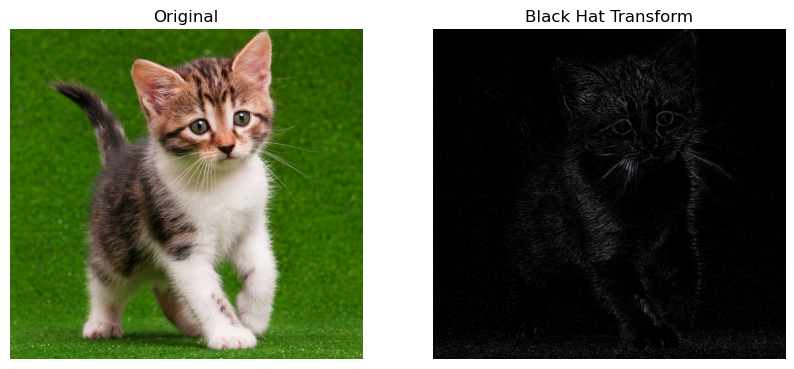

In [34]:
image = cv.imread('images/kitten01.jpg')
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Define a kernel (structuring element) - you can adjust its size based on your requirements
kernel = np.ones((5, 5), np.uint8)

# Perform the black hat transform
black_hat = cv.morphologyEx(image, cv.MORPH_BLACKHAT, kernel)

# PLOTTING
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 20))
ax1.axis("off")
ax1.title.set_text('Original')

ax2.axis("off")
ax2.title.set_text("Black Hat Transform")

ax1.imshow(image)
ax2.imshow(black_hat)
plt.show()

#### 12. Skeletonization Image

In [35]:
def skeletonize(image):
    skeleton = np.copy(image)
    has_changed = True

    while has_changed:
        has_changed = False
        # Step 1
        marker_positions = []
        for y in range(1, image.shape[0] - 1):
            for x in range(1, image.shape[1] - 1):
                if skeleton[y, x] == 1:
                    neighbors = image[y-1:y+2, x-1:x+2]
                    transitions = (np.sum(neighbors) - 1) / 2
                    if 2 <= transitions <= 6:
                        if neighbors[0, 1] * neighbors[1, 0] * neighbors[1, 2] == 0:
                            if neighbors[0, 1] * neighbors[1, 2] * neighbors[2, 1] == 0:
                                marker_positions.append((y, x))

        for y, x in marker_positions:
            skeleton[y, x] = 0

        # Step 2
        marker_positions = []
        for y in range(1, image.shape[0] - 1):
            for x in range(1, image.shape[1] - 1):
                if skeleton[y, x] == 1:
                    neighbors = image[y-1:y+2, x-1:x+2]
                    transitions = (np.sum(neighbors) - 1) / 2
                    if 2 <= transitions <= 6:
                        if neighbors[0, 1] * neighbors[1, 0] * neighbors[2, 1] == 0:
                            if neighbors[0, 1] * neighbors[1, 2] * neighbors[2, 1] == 0:
                                marker_positions.append((y, x))

        for y, x in marker_positions:
            skeleton[y, x] = 0

        if marker_positions:
            has_changed = True

    return skeleton

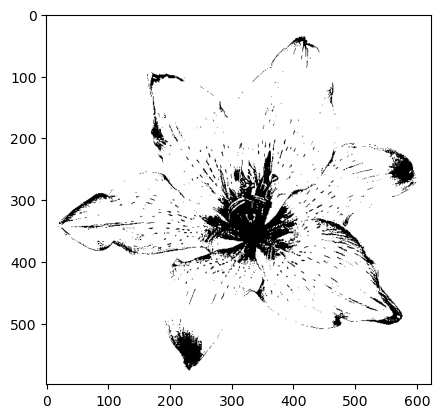

In [36]:
# Create a simple binary image for testing
image = cv.imread('images/lily.jpg')
image_bin = binarize_img('images/lily.jpg')

skeletonized_image = skeletonize(image_bin)

plt.imshow(skeletonized_image, cmap='gray')

In [37]:
cv.imshow('skeletonized_image', skeletonized_image)

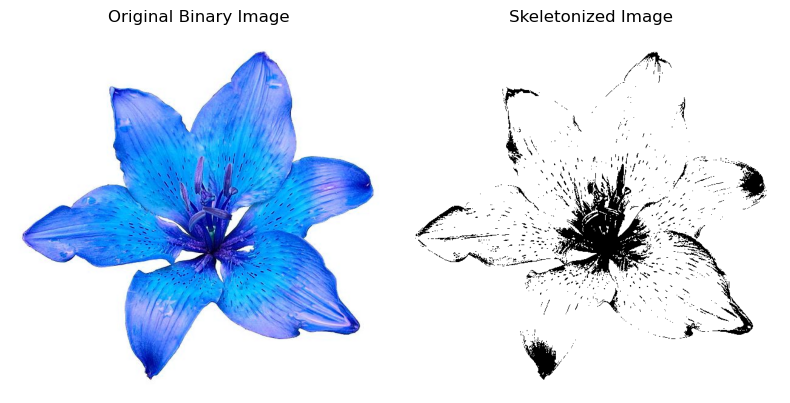

In [38]:
# Display the original and skeletonized images
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original Binary Image')
ax[0].axis('off')

ax[1].imshow(skeletonized_image, cmap=plt.cm.gray)
ax[1].set_title('Skeletonized Image')
ax[1].axis('off')

plt.tight_layout()
plt.show()